# Convolutionary Neural Networks

Dataset is here: https://github.com/alexeygrigorev/clothing-dataset-small

In [1]:
import tensorflow as tf

2022-11-22 14:12:40.513047: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from tensorflow.keras.preprocessing.image import load_img

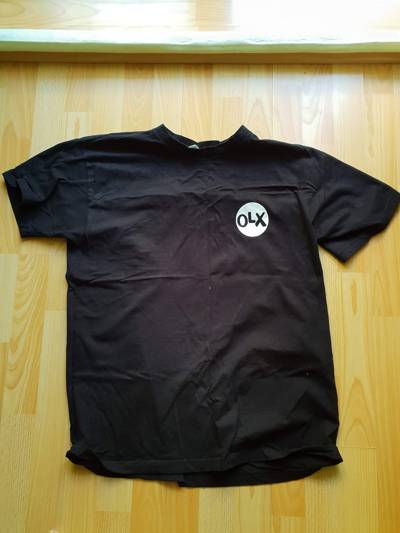

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
## 299, 224, 150
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [9]:
##PIL python image library
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F1A7085D9D0>


In [10]:
np.array(img)

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [11]:
## dtype = uint8 unsign integer 8 or (one byte)

## 8.3 Pre-trained convolutional neural networks

Imagenet dataset: https://www.image-net.org/
Pre-trained models: https://keras.io/api/applications/

In [12]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


In [13]:
## model trained on imagenet
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-11-22 14:12:51.810323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 14:12:51.816834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 14:12:51.817451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 14:12:51.818522: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [14]:
## X is one image we have, the loaded one
X = np.array([x])

In [15]:
X.shape

(1, 299, 299, 3)

In [16]:
## The model expects the input to look in a certain way so that is why prepocessing is done
X = preprocess_input(X)

In [17]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [18]:
pred = model.predict(X)

2022-11-22 14:12:55.587107: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-22 14:12:56.247329: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 14:12:56.248277: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 14:12:56.248320: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-22 14:12:56.249445: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 14:12:56.249554: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [19]:
pred.shape

(1, 1000)

In [20]:
## Each value in in the pred array is the probability that the image belongs to some class. We need to know what are the
## classes for each cell.

pred

array([[3.23797634e-04, 1.57364208e-04, 2.14055952e-04, 1.52957291e-04,
        2.46565614e-04, 3.04462243e-04, 3.23487271e-04, 1.47259430e-04,
        2.04865966e-04, 1.48656196e-04, 1.95693923e-04, 2.11568957e-04,
        7.61277915e-05, 1.14591508e-04, 1.64077312e-04, 2.07021279e-04,
        1.96367881e-04, 1.44514634e-04, 1.40078540e-04, 1.73651570e-04,
        7.50312116e-04, 2.55688588e-04, 2.66562623e-04, 2.96249607e-04,
        3.71848786e-04, 2.81153130e-04, 2.16759348e-04, 2.26841454e-04,
        3.82645841e-04, 1.72122993e-04, 3.08603921e-04, 1.97759553e-04,
        3.93641531e-04, 4.78195376e-04, 2.90634343e-04, 3.26480367e-04,
        1.47040075e-04, 1.63521981e-04, 2.14072497e-04, 1.34214657e-04,
        2.41729620e-04, 6.72481779e-04, 2.53319478e-04, 1.42904013e-04,
        4.11025569e-04, 2.05692108e-04, 3.04202345e-04, 1.49993532e-04,
        2.00595066e-04, 2.28324570e-04, 2.97196471e-04, 2.30766847e-04,
        6.29545364e-04, 7.80994305e-04, 2.47867749e-04, 4.030102

In [21]:
##Each what classes represent
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

This model has little/no information about T-shirts.

More details: https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json

It can be adapted to suit outr purpose.

## 8.4 Convolutional neural networks
Types of layers: 
- convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/

---

## 8.5 Tranfser learning

- Reading data with `ImageDataGenerator`
- Train Xception on smaller images (150x150). (Better to run it with a GPU)



In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [23]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [24]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)


Found 3068 images belonging to 10 classes.


In [25]:
### checking the class indices
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [26]:
!ls -l clothing-dataset-small/train

total 264
drwxrwsr-x 2 jovyan jovyan 20480 Nov 19 21:07 dress
drwxrwsr-x 2 jovyan jovyan 12288 Nov 19 21:07 hat
drwxrwsr-x 2 jovyan jovyan 36864 Nov 19 21:07 longsleeve
drwxrwsr-x 2 jovyan jovyan 20480 Nov 19 21:07 outwear
drwxrwsr-x 2 jovyan jovyan 36864 Nov 19 21:07 pants
drwxrwsr-x 2 jovyan jovyan 24576 Nov 19 21:07 shirt
drwxrwsr-x 2 jovyan jovyan 20480 Nov 19 21:07 shoes
drwxrwsr-x 2 jovyan jovyan 20480 Nov 19 21:07 shorts
drwxrwsr-x 2 jovyan jovyan 12288 Nov 19 21:07 skirt
drwxrwsr-x 2 jovyan jovyan 65536 Nov 19 21:07 t-shirt


classes are the folder names in the file structure

In [27]:
X, y = next(train_ds)

In [28]:
X

array([[[[-0.6627451 , -0.54509807, -0.01960784],
         [-0.60784316, -0.46666664,  0.03529418],
         [-0.62352943, -0.46666664,  0.02745104],
         ...,
         [-0.92941177, -0.92156863, -0.6784314 ],
         [-0.94509804, -0.9372549 , -0.69411767],
         [-0.9607843 , -0.9529412 , -0.70980394]],

        [[-0.4980392 , -0.41960782, -0.00392157],
         [-0.67058825, -0.6       , -0.16862744],
         [-0.6627451 , -0.5764706 , -0.1372549 ],
         ...,
         [-0.9843137 , -0.94509804, -0.70980394],
         [-0.9843137 , -0.94509804, -0.70980394],
         [-0.9764706 , -0.9372549 , -0.7019608 ]],

        [[-0.1607843 , -0.12156862,  0.02745104],
         [-0.18431371, -0.1372549 ,  0.03529418],
         [-0.31764704, -0.26274508, -0.04313725],
         ...,
         [-0.9843137 , -0.92941177, -0.7019608 ],
         [-0.96862745, -0.9137255 , -0.6862745 ],
         [-0.94509804, -0.8901961 , -0.6627451 ]],

        ...,

        [[-0.70980394, -0.5372549 , -0

In [29]:
y[:3]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [30]:
## validation set
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [31]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

###lAST LINE MEANS DON'T CHANGE Convulutinoal layer

In [32]:

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)
##change 3 dimensional array to one dimensional array

outputs = keras.layers.Dense(10)(vectors)

##There are 10 classes.

model = keras.Model(inputs, outputs)

In [33]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [34]:
preds.shape

(32, 10)

In [35]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
## It will show the accuracy

In [36]:

history = model.fit(train_ds, epochs=10, validation_data=val_ds)
## 10 epochs means go over the data 10 times.


Epoch 1/10
96/96 [==============================] - 18s 164ms/step - loss: 1.2367 - accuracy: 0.6679 - val_loss: 0.7645 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 12s 125ms/step - loss: 0.5253 - accuracy: 0.8282 - val_loss: 0.9159 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3582 - accuracy: 0.8716 - val_loss: 0.9645 - val_accuracy: 0.7801
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 0.2632 - accuracy: 0.9074 - val_loss: 0.9187 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1755 - accuracy: 0.9436 - val_loss: 0.8792 - val_accuracy: 0.8270
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.1118 - accuracy: 0.9619 - val_loss: 0.9099 - val_accuracy: 0.7918
Epoch 7/10
96/96 [==============================] - 12s 125ms/step - loss: 0.0600 - accuracy: 0.9834 - val_loss: 0.9593 - val_accuracy: 0.8065

Softmax is called activation

In [37]:
history.history['accuracy']

[0.667861819267273,
 0.8282268643379211,
 0.8715775609016418,
 0.9074315428733826,
 0.9436115026473999,
 0.9618644118309021,
 0.9833768010139465,
 0.9850065112113953,
 0.9908735156059265,
 0.9947848916053772]

In [38]:
history.history['val_accuracy']

[0.7829912304878235,
 0.7800586223602295,
 0.7800586223602295,
 0.7976539731025696,
 0.8269794583320618,
 0.7917888760566711,
 0.8064516186714172,
 0.7800586223602295,
 0.7888563275337219,
 0.8152492642402649]

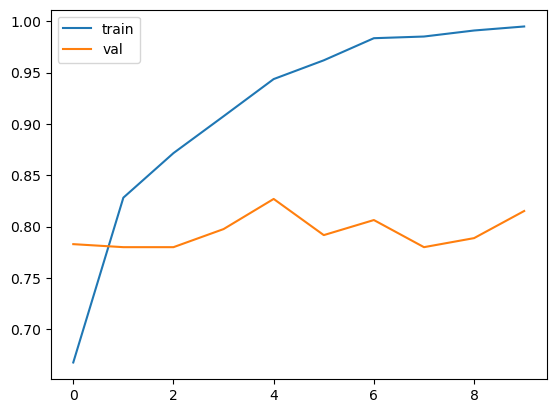

In [39]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

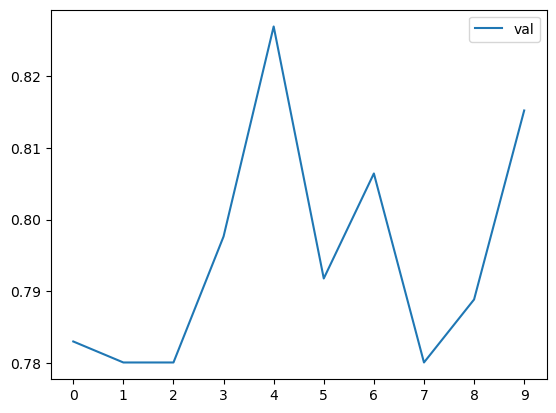

In [40]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate
- What's the learning rate
- Trying different values

In [41]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [42]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 133ms/step - loss: 2.0026 - accuracy: 0.3139 - val_loss: 1.6446 - val_accuracy: 0.4575
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 1.4217 - accuracy: 0.5570 - val_loss: 1.2760 - val_accuracy: 0.5953
Epoch 3/10
96/96 [==============================] - 12s 125ms/step - loss: 1.1619 - accuracy: 0.6362 - val_loss: 1.0902 - val_accuracy: 0.6540
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 1.0170 - accuracy: 0.6838 - val_loss: 0.9729 - val_accuracy: 0.7185
Epoch 5/10
96/96 [==============================] - 12s 126ms/step - loss: 0.9202 - accuracy: 0.7138 - val_loss: 0.8975 - val_accuracy: 0.7390
Epoch 6/10
96/96 [==============================] - 12s 125ms/step - loss: 0.8512 - accuracy: 0.7331 - val_loss: 0.8432 - val_accuracy: 0.7654
Epoch 7/10
96/96 [==============================] - 12s 125ms/step - loss: 0.7978 - accuracy: 0.7474 - val_loss: 0.8015 - val_accuracy:

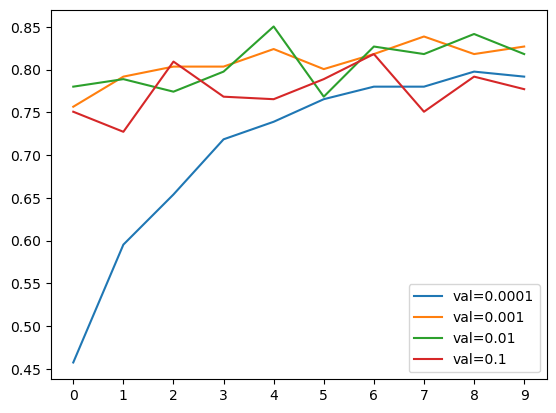

In [43]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [44]:
del scores[0.1]
del scores[0.0001]

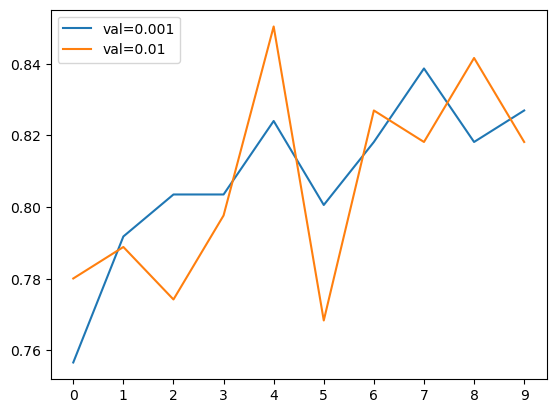

In [45]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

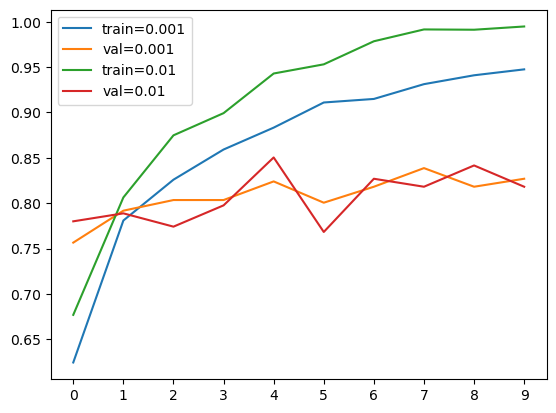

In [46]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

The gap for 0.01 is too much

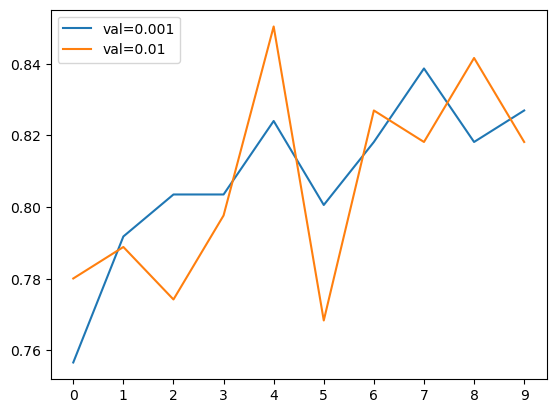

In [47]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [48]:
learning_rate = 0.001

## 8.7 Checkpointing
- Saving the best model only
- Training a model with callbacks

In [49]:
model.save_weights('model_v1.h5', save_format='h5')

In [50]:
##save best only means we only care if it is better than previous.
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [51]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 137ms/step - loss: 1.1259 - accuracy: 0.6102 - val_loss: 0.7557 - val_accuracy: 0.7449
Epoch 2/10
96/96 [==============================] - 12s 128ms/step - loss: 0.6415 - accuracy: 0.7754 - val_loss: 0.6073 - val_accuracy: 0.8094
Epoch 3/10
96/96 [==============================] - 12s 126ms/step - loss: 0.5103 - accuracy: 0.8321 - val_loss: 0.5701 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 12s 127ms/step - loss: 0.4288 - accuracy: 0.8625 - val_loss: 0.5616 - val_accuracy: 0.8123
Epoch 5/10
96/96 [==============================] - 12s 128ms/step - loss: 0.3701 - accuracy: 0.8889 - val_loss: 0.5567 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 12s 127ms/step - loss: 0.3306 - accuracy: 0.9078 - val_loss: 0.5315 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2922 - accuracy: 0.9188 - val_loss: 0.5361 - val_accuracy: 0.8123